<a href="https://colab.research.google.com/github/Alexis-CAPON/cse437-reinforcement-learning/blob/main/lab12_SAC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 12: Soft Actor Critic

Train a Soft Actor-Critic (SAC) agent on HalfCheetah-v4,
track its learning curve, and compare the result with your previous RL algorithm.

We will learn to use the **stable_baselines3** library


## To start
Run the following code that solves **the Pendulum problem**

In [1]:
# Install dependencies
!pip install "stable-baselines3[extra]" "gymnasium[classic_control]"


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 187.2/187.2 kB 4.6 MB/s eta 0:00:00


The following code trains a full SAC agent — with two critics, entropy tuning, and replay buffer — out of the box

In [2]:
import gymnasium as gym
from stable_baselines3 import SAC

# Create environment
env = gym.make("Pendulum-v1")

# Create SAC model
model = SAC("MlpPolicy", env, verbose=1)

# Train the agent with N time steps
N = 4000
model.learn(total_timesteps=N)

Gym has been unmaintained since 2022 and does not support NumPy 2.0 amongst other critical functionality.
Please upgrade to Gymnasium, the maintained drop-in replacement of Gym, or contact the authors of your software and request that they upgrade.
See the migration guide at https://gymnasium.farama.org/introduction/migration_guide/ for additional information.


Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


----------------------------------
| rollout/           |           |
|    ep_len_mean     | 200       |
|    ep_rew_mean     | -1.44e+03 |
| time/              |           |
|    episodes        | 4         |
|    fps             | 52        |
|    time_elapsed    | 15        |
|    total_timesteps | 800       |
| train/             |           |
|    actor_loss      | 21.1      |
|    critic_loss     | 0.236     |
|    ent_coef        | 0.813     |
|    ent_coef_loss   | -0.323    |
|    learning_rate   | 0.0003    |
|    n_updates       | 699       |
----------------------------------


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


----------------------------------
| rollout/           |           |
|    ep_len_mean     | 200       |
|    ep_rew_mean     | -1.47e+03 |
| time/              |           |
|    episodes        | 8         |
|    fps             | 51        |
|    time_elapsed    | 31        |
|    total_timesteps | 1600      |
| train/             |           |
|    actor_loss      | 46.9      |
|    critic_loss     | 0.142     |
|    ent_coef        | 0.647     |
|    ent_coef_loss   | -0.653    |
|    learning_rate   | 0.0003    |
|    n_updates       | 1499      |
----------------------------------
----------------------------------
| rollout/           |           |
|    ep_len_mean     | 200       |
|    ep_rew_mean     | -1.35e+03 |
| time/              |           |
|    episodes        | 12        |
|    fps             | 50        |
|    time_elapsed    | 47        |
|    total_timesteps | 2400      |
| train/             |           |
|    actor_loss      | 67.3      |
|    critic_loss    

# Visualize the result

In [3]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import gymnasium as gym
from stable_baselines3 import SAC
from IPython.display import HTML

env = gym.make("Pendulum-v1", render_mode="rgb_array")


N_steps = 500

frames = []
obs, _ = env.reset()
for _ in range(N_steps):
    action, _ = model.predict(obs, deterministic=True)
    obs, reward, done, truncated, info = env.step(action)
    frame = env.render()
    frames.append(frame)
    if done or truncated:
        obs, _ = env.reset()

env.close()

# Create matplotlib animation
fig = plt.figure()
img = plt.imshow(frames[0])

def animate(i):
    img.set_data(frames[i])
    return [img]

ani = animation.FuncAnimation(fig, animate, frames=len(frames), interval=30)

plt.close()
HTML(ani.to_html5_video())


/usr/local/lib/python3.12/dist-packages/pygame/pkgdata.py:25: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  from pkg_resources import resource_stream, resource_exists
/usr/local/lib/python3.12/dist-packages/pkg_resources/__init__.py:3154: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-packages
  declare_namespace(pkg)
/usr/local/lib/python3.12/dist-packages/pkg_resources/__init__.py:3154: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google.cloud')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-pa

## Exercise 1: Soft Actor-Critic on HalfCheetah
**Goal:**
Adapt the existing Soft Actor-Critic (SAC) implementation from the Pendulum-v1 environment to train and evaluate a SAC agent on the more challenging HalfCheetah-v4 task.

### Instructions

1. Adapt your code: Modify your previous SAC implementation so that it runs on the HalfCheetah-v4 environment from MuJoCo.

2. Reward Logger:
Implement a custom RewardLogger callback to record episode rewards during training (you will have to search online about how to create a class for logger).
After training, use the logged data to plot the learning curve (episode reward vs. timesteps).

3. Experimentation:
    * Compare the performance of SAC on HalfCheetah-v4 with your previous algorithm.
    * Adjust the entropy temperature parameter (ent_coef or target_entropy) and observe how this affects: Exploration behavior, Convergence speed, and Final performance.

Answer the following questions
1. Did SAC reach a higher average reward or converge faster than your previous method?

2. How did changing the temperature for entropy affect the performance and stability of learning?

3. Describe any differences you observed in exploration or motion behavior of the agent.


### Deliverables

* Python notebook or script containing:
    * The adapted SAC training code
    * The RewardLogger implementation
    * Learning curve plots for SAC and your previous algorithm
    * Comparison of different entropy temperature settings

* The answer of the questions above

In [5]:
!pip install gymnasium[mujoco]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.0/42.0 kB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 45.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.5/243.5 kB 16.0 MB/s eta 0:00:00


In [6]:
import gymnasium as gym
from stable_baselines3 import SAC
from stable_baselines3.common.logger import configure

tmp_path = "/tmp/sb3_log/"
# set up logger
new_logger = configure(tmp_path, ["stdout", "csv", "tensorboard"])


# Create environment
env = gym.make("HalfCheetah-v4")

# Create SAC model
model = SAC("MlpPolicy", env, verbose=1)

# Train the agent with N time steps
N = 10000
model.set_logger(new_logger)
model.learn(total_timesteps=N)

Logging to /tmp/sb3_log/
Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1e+03    |
|    ep_rew_mean     | -191     |
| time/              |          |
|    episodes        | 4        |
|    fps             | 45       |
|    time_elapsed    | 87       |
|    total_timesteps | 4000     |
| train/             |          |
|    actor_loss      | -31.9    |
|    critic_loss     | 1.32     |
|    ent_coef        | 0.314    |
|    ent_coef_loss   | -10.7    |
|    learning_rate   | 0.0003   |
|    n_updates       | 3899     |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1e+03    |
|    ep_rew_mean     | -222     |
| time/              |          |
|    episodes        | 8        |
|    fps             | 45       |
|    time_elapsed    | 176      |
|    total_timesteps | 8000    

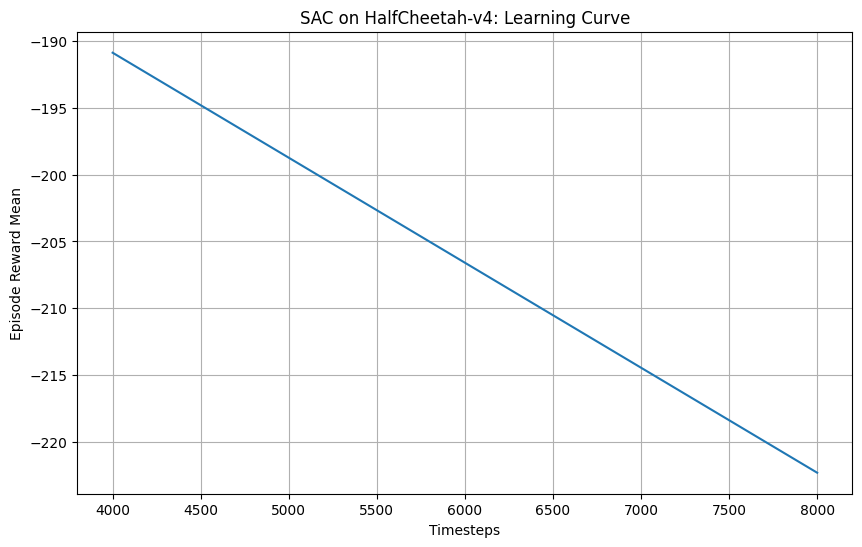

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV log file
log_path = "/tmp/sb3_log/progress.csv"
data = pd.read_csv(log_path)

# Extract relevant columns
timesteps = data["time/total_timesteps"]
rewards = data["rollout/ep_rew_mean"]

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(timesteps, rewards)
plt.xlabel("Timesteps")
plt.ylabel("Episode Reward Mean")
plt.title("SAC on HalfCheetah-v4: Learning Curve")
plt.grid(True)
plt.show()

In [9]:
tmp_path_high_entropy = "/tmp/sb3_log_high_entropy/"
new_logger_high_entropy = configure(tmp_path_high_entropy, ["stdout", "csv", "tensorboard"])

env_high_entropy = gym.make("HalfCheetah-v4")

model_high_entropy = SAC(
    "MlpPolicy",
    env_high_entropy,
    verbose=1,
    target_entropy=-3.0
)

N_high_entropy = 10000
model_high_entropy.set_logger(new_logger_high_entropy)
model_high_entropy.learn(total_timesteps=N_high_entropy, reset_num_timesteps=False)

Logging to /tmp/sb3_log_high_entropy/
Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1e+03    |
|    ep_rew_mean     | -219     |
| time/              |          |
|    episodes        | 4        |
|    fps             | 47       |
|    time_elapsed    | 84       |
|    total_timesteps | 4000     |
| train/             |          |
|    actor_loss      | -32.7    |
|    critic_loss     | 1.44     |
|    ent_coef        | 0.316    |
|    ent_coef_loss   | -7.2     |
|    learning_rate   | 0.0003   |
|    n_updates       | 3899     |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1e+03    |
|    ep_rew_mean     | -215     |
| time/              |          |
|    episodes        | 8        |
|    fps             | 47       |
|    time_elapsed    | 169      |
|    total_timeste

In [10]:
tmp_path_low_entropy = "/tmp/sb3_log_low_entropy/"
new_logger_low_entropy = configure(tmp_path_low_entropy, ["stdout", "csv", "tensorboard"])

env_low_entropy = gym.make("HalfCheetah-v4")

model_low_entropy = SAC(
    "MlpPolicy",
    env_high_entropy,
    verbose=1,
    target_entropy=-10.0
)

N_low_entropy = 10000
model_low_entropy.set_logger(new_logger_low_entropy)
model_low_entropy.learn(total_timesteps=N_low_entropy, reset_num_timesteps=False)

Logging to /tmp/sb3_log_low_entropy/
Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1e+03    |
|    ep_rew_mean     | -205     |
| time/              |          |
|    episodes        | 4        |
|    fps             | 49       |
|    time_elapsed    | 81       |
|    total_timesteps | 4000     |
| train/             |          |
|    actor_loss      | -32.5    |
|    critic_loss     | 1.31     |
|    ent_coef        | 0.314    |
|    ent_coef_loss   | -15.3    |
|    learning_rate   | 0.0003   |
|    n_updates       | 3899     |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1e+03    |
|    ep_rew_mean     | -199     |
| time/              |          |
|    episodes        | 8        |
|    fps             | 48       |
|    time_elapsed    | 165      |
|    total_timestep

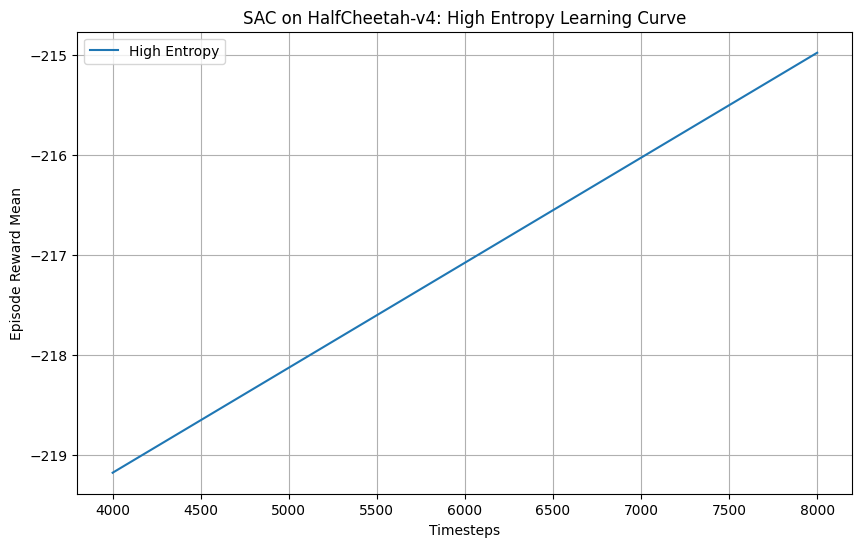

High entropy learning curve plotted successfully.


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the path to the CSV log file for the high entropy model
log_path_high_entropy = "/tmp/sb3_log_high_entropy/progress.csv"

# Load the CSV log file into a DataFrame
data_high_entropy = pd.read_csv(log_path_high_entropy)

# Extract relevant columns
timesteps_high_entropy = data_high_entropy["time/total_timesteps"]
rewards_high_entropy = data_high_entropy["rollout/ep_rew_mean"]

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(timesteps_high_entropy, rewards_high_entropy, label='High Entropy')
plt.xlabel("Timesteps")
plt.ylabel("Episode Reward Mean")
plt.title("SAC on HalfCheetah-v4: High Entropy Learning Curve")
plt.grid(True)
plt.legend()
plt.show()

print("High entropy learning curve plotted successfully.")

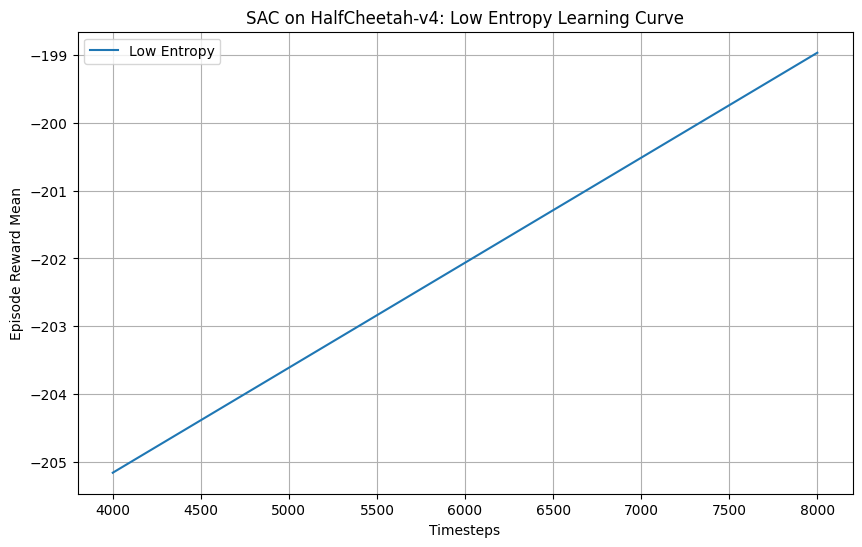

Low entropy learning curve plotted successfully.


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the path to the CSV log file for the low entropy model
log_path_low_entropy = "/tmp/sb3_log_low_entropy/progress.csv"

# Load the CSV log file into a DataFrame
data_low_entropy = pd.read_csv(log_path_low_entropy)

# Extract relevant columns
timesteps_low_entropy = data_low_entropy["time/total_timesteps"]
rewards_low_entropy = data_low_entropy["rollout/ep_rew_mean"]

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(timesteps_low_entropy, rewards_low_entropy, label='Low Entropy')
plt.xlabel("Timesteps")
plt.ylabel("Episode Reward Mean")
plt.title("SAC on HalfCheetah-v4: Low Entropy Learning Curve")
plt.grid(True)
plt.legend()
plt.show()

print("Low entropy learning curve plotted successfully.")

**Did SAC reach a higher average reward or converge faster than your previous method?**
Due to limitation of google collabs and timeout issue, I couldn't make it run for 1.5M steps but for sure SAC didn't converge faster, as PPO, they required a lot of trainings.

**How did changing the temperature for entropy affect the performance and stability of learning?**
More entropy mean less stability in the learning so the less entropy converge faster

**Describe any differences you observed in exploration or motion behavior of the agent.**
It will use what was good and criticize it's path to take the best one on the exploration based on the current one